In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/train.csv'

In [4]:
data_test = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/test.csv'

In [5]:
dftrain = pd.read_csv(data)

In [6]:
dftrain.shape

(20216100, 4)

In [7]:
target = dftrain['meter_reading']

In [8]:
dftest = pd.read_csv(data_test)

In [9]:
df = pd.concat((dftrain,dftest),sort=False)

In [10]:
df.head()

,building_id,meter,timestamp,meter_reading,row_id
0,0,0,2016-01-01 00:00:00,0.0,NaN
1,1,0,2016-01-01 00:00:00,0.0,NaN
2,2,0,2016-01-01 00:00:00,0.0,NaN
3,3,0,2016-01-01 00:00:00,0.0,NaN
4,4,0,2016-01-01 00:00:00,0.0,NaN


In [11]:
df.drop(['row_id','meter_reading'],axis = 1,inplace=True)

In [12]:
df.shape

(61913700, 3)

In [13]:
df.dtypes

building_id     int64
meter           int64
timestamp      object
dtype: object

In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [15]:
df.building_id.max()

1448

In [16]:
df['building_id']=df.building_id.astype('int16')

In [17]:
df.dtypes

building_id             int16
meter                   int64
timestamp      datetime64[ns]
dtype: object

In [18]:
df.meter.max()

3

In [19]:
df['meter']=df.meter.astype('int8')

In [20]:
df.dtypes

building_id             int16
meter                    int8
timestamp      datetime64[ns]
dtype: object

In [22]:
train = df[:20216100]
test = df[20216100:]

In [23]:
data1 = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/building_metadata.csv'

In [24]:
dfmeta = pd.read_csv(data1)

In [25]:
dfmeta.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [26]:
dfmeta.shape

(1449, 6)

In [27]:
dfmeta.dtypes

site_id          int64
building_id      int64
primary_use     object
square_feet      int64
year_built     float64
floor_count    float64
dtype: object

In [28]:
dfmeta.floor_count.isnull().sum()

1094

In [29]:
dfmeta = dfmeta.drop('floor_count', axis=1)

In [30]:
dfmeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     675 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 56.7+ KB


In [31]:
dfmeta['primary_use'].value_counts()

Education                        549
Office                           279
Entertainment/public assembly    184
Public services                  156
Lodging/residential              147
Other                             25
Healthcare                        23
Parking                           22
Warehouse/storage                 13
Manufacturing/industrial          12
Retail                            11
Services                          10
Technology/science                 6
Food sales and service             5
Utility                            4
Religious worship                  3
Name: primary_use, dtype: int64

In [32]:
dfmeta.year_built.describe()

count     675.000000
mean     1967.957037
std        31.054030
min      1900.000000
25%      1949.000000
50%      1970.000000
75%      1995.000000
max      2017.000000
Name: year_built, dtype: float64

In [33]:
dfmeta.groupby('primary_use')['year_built'].mean()

primary_use
Education                        1962.579755
Entertainment/public assembly    1970.904110
Food sales and service           2012.000000
Healthcare                       1982.250000
Lodging/residential              1973.282353
Manufacturing/industrial         1957.666667
Office                           1972.894118
Other                            1981.500000
Parking                          1998.500000
Public services                  1964.333333
Religious worship                1979.000000
Retail                           1997.571429
Services                                 NaN
Technology/science               1939.000000
Utility                          1976.333333
Warehouse/storage                1983.400000
Name: year_built, dtype: float64

In [34]:
dfmeta.groupby('primary_use')['year_built'].median()

primary_use
Education                        1966.0
Entertainment/public assembly    1976.0
Food sales and service           2012.0
Healthcare                       2000.0
Lodging/residential              1975.0
Manufacturing/industrial         1969.0
Office                           1976.0
Other                            1980.0
Parking                          2003.0
Public services                  1968.0
Religious worship                1979.0
Retail                           1996.0
Services                            NaN
Technology/science               1942.0
Utility                          1990.0
Warehouse/storage                1979.0
Name: year_built, dtype: float64

In [35]:
dfmeta.loc[dfmeta.year_built.isnull(), 'year_built'] = dfmeta.groupby('primary_use').year_built.transform('median')

In [36]:
dfmeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 5 columns):
site_id        1449 non-null int64
building_id    1449 non-null int64
primary_use    1449 non-null object
square_feet    1449 non-null int64
year_built     1439 non-null float64
dtypes: float64(1), int64(3), object(1)
memory usage: 56.7+ KB


In [37]:
dfmeta[dfmeta.year_built.isnull()==True]

,site_id,building_id,primary_use,square_feet,year_built
892,9,892,Services,481999,NaN
944,9,944,Services,389641,NaN
970,9,970,Services,346056,NaN
982,9,982,Services,373416,NaN
984,9,984,Services,214252,NaN
1115,13,1115,Services,42028,NaN
1116,13,1116,Services,11681,NaN
1118,13,1118,Services,26926,NaN
1120,13,1120,Services,70040,NaN
1197,13,1197,Services,50552,NaN


In [38]:
dfmeta = dfmeta.fillna(2000)

In [39]:
dfmeta[dfmeta.primary_use=='Services']

,site_id,building_id,primary_use,square_feet,year_built
892,9,892,Services,481999,2000.0
944,9,944,Services,389641,2000.0
970,9,970,Services,346056,2000.0
982,9,982,Services,373416,2000.0
984,9,984,Services,214252,2000.0
1115,13,1115,Services,42028,2000.0
1116,13,1116,Services,11681,2000.0
1118,13,1118,Services,26926,2000.0
1120,13,1120,Services,70040,2000.0
1197,13,1197,Services,50552,2000.0


In [40]:
dfmeta['year_built'] = dfmeta['year_built'].astype('float16')

[Text(0, 0, 'Education'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Parking'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Warehouse/storage'),
 Text(0, 0, 'Food sales and service'),
 Text(0, 0, 'Religious worship'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Utility'),
 Text(0, 0, 'Technology/science'),
 Text(0, 0, 'Manufacturing/industrial'),
 Text(0, 0, 'Services')]

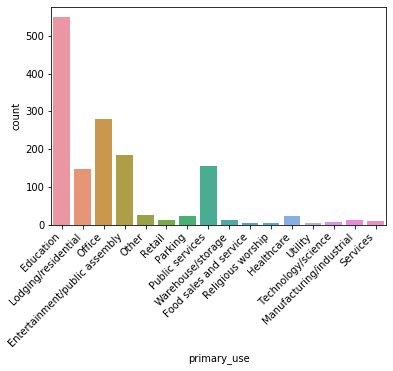

In [41]:
chart = sns.countplot(dfmeta.primary_use)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment = 'right')

In [211]:
dfencode = pd.get_dummies(dfmeta, columns = ['primary_use'], prefix = ['primary'])

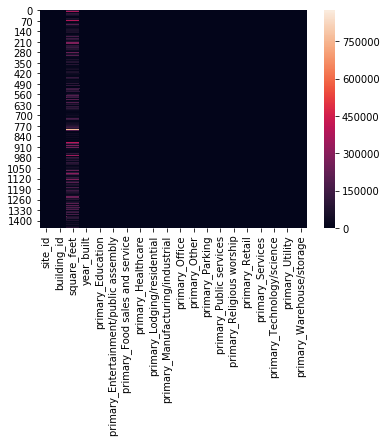

In [212]:
sns.heatmap(dfencode)
plt.show()

In [213]:
dfencode.square_feet.describe()

count      1449.000000
mean      92111.776398
std      110769.950997
min         283.000000
25%       23012.000000
50%       57673.000000
75%      115676.000000
max      875000.000000
Name: square_feet, dtype: float64

In [214]:
dfencode.square_feet.isnull().sum()

0

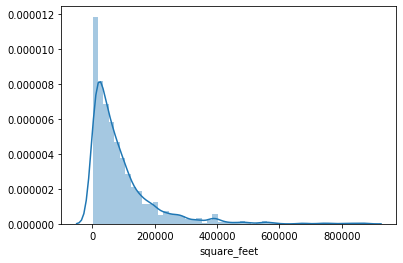

In [215]:
sns.distplot(dfencode.square_feet)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
dfencode['square_feet'] = (dfencode['square_feet']-dfencode['square_feet'].mean())/dfencode['square_feet'].std()

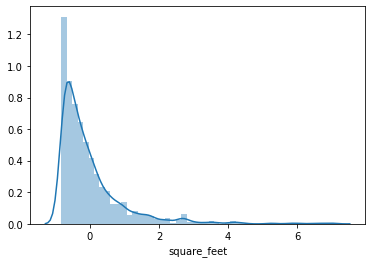

In [49]:
sns.distplot(dfencode.square_feet)

In [50]:
dfencode[dfencode.square_feet>4]

,site_id,building_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,primary_Lodging/residential,primary_Manufacturing/industrial,primary_Office,primary_Other,primary_Parking,primary_Public services,primary_Religious worship,primary_Retail,primary_Services,primary_Technology/science,primary_Utility,primary_Warehouse/storage
166,2,166,4.162665,2009.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
243,2,243,4.198839,2004.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
269,2,269,6.476650,1958.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
365,3,365,6.567352,1922.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
375,3,375,6.845198,1989.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
376,3,376,4.458278,1942.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
518,3,518,4.181019,1941.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
794,7,794,5.776235,1969.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
797,7,797,6.067758,1979.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
869,8,869,7.067695,1976.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Normalize (Optional)

In [50]:
dfencode['square_feet'] = (dfencode['square_feet'] - dfencode['square_feet'].min())/(dfencode['square_feet'].max()-dfencode['square_feet'].min())

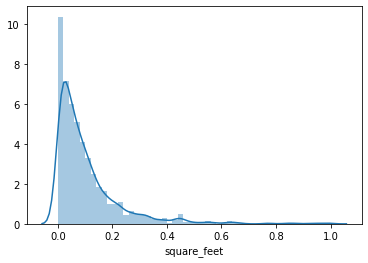

In [51]:
sns.distplot(dfencode.square_feet)

# Continue

In [216]:
weatherdata = 'C:/Users/pradeepo/Downloads/Kaggle/Energy/weather_train.csv'

In [217]:
dfw = pd.read_csv(weatherdata)

In [218]:
dfw.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [219]:
dfw.dtypes

site_id                 int64
timestamp              object
air_temperature       float64
cloud_coverage        float64
dew_temperature       float64
precip_depth_1_hr     float64
sea_level_pressure    float64
wind_direction        float64
wind_speed            float64
dtype: object

In [220]:
dfw['timestamp'] = pd.to_datetime(dfw['timestamp'])

In [221]:
dfw.dtypes

site_id                        int64
timestamp             datetime64[ns]
air_temperature              float64
cloud_coverage               float64
dew_temperature              float64
precip_depth_1_hr            float64
sea_level_pressure           float64
wind_direction               float64
wind_speed                   float64
dtype: object

In [222]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null datetime64[ns]
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.6 MB


# precip_depth_1_hr

In [223]:
dfw.precip_depth_1_hr.value_counts()

 0.0      77910
-1.0       5780
 3.0       1469
 5.0        720
 2.0        517
 8.0        447
 10.0       369
 13.0       264
 15.0       194
 18.0       167
 20.0       127
 7.0        103
 6.0         90
 23.0        80
 25.0        75
 33.0        73
 28.0        70
 4.0         68
 30.0        68
 38.0        50
 36.0        47
 43.0        39
 11.0        38
 41.0        38
 9.0         36
 12.0        36
 46.0        32
 17.0        29
 53.0        25
 48.0        20
          ...  
 343.0        2
 164.0        2
 201.0        2
 150.0        2
 217.0        2
 163.0        2
 47.0         2
 236.0        2
 162.0        2
 42.0         2
 310.0        2
 221.0        2
 103.0        2
 105.0        2
 198.0        2
 152.0        2
 241.0        2
 340.0        2
 142.0        2
 196.0        2
 107.0        2
 211.0        1
 78.0         1
 140.0        1
 147.0        1
 175.0        1
 73.0         1
 333.0        1
 109.0        1
 180.0        1
Name: precip_depth_1_hr,

In [224]:
dfw.groupby('timestamp')['precip_depth_1_hr'].mean()

timestamp
2016-01-01 00:00:00         NaN
2016-01-01 01:00:00   -0.300000
2016-01-01 02:00:00   -0.100000
2016-01-01 03:00:00   -0.100000
2016-01-01 04:00:00   -0.200000
2016-01-01 05:00:00    0.000000
2016-01-01 06:00:00   -0.200000
2016-01-01 07:00:00   -0.100000
2016-01-01 08:00:00    0.833333
2016-01-01 09:00:00   -0.100000
2016-01-01 10:00:00    0.666667
2016-01-01 11:00:00   -0.100000
2016-01-01 12:00:00    0.250000
2016-01-01 13:00:00    0.000000
2016-01-01 14:00:00    0.000000
2016-01-01 15:00:00    0.000000
2016-01-01 16:00:00    0.000000
2016-01-01 17:00:00    0.000000
2016-01-01 18:00:00    0.500000
2016-01-01 19:00:00    0.000000
2016-01-01 20:00:00    0.000000
2016-01-01 21:00:00    0.000000
2016-01-01 22:00:00    0.000000
2016-01-01 23:00:00    0.000000
2016-01-02 00:00:00   -0.200000
2016-01-02 01:00:00    0.000000
2016-01-02 02:00:00    0.000000
2016-01-02 03:00:00    0.000000
2016-01-02 04:00:00    0.000000
2016-01-02 05:00:00    0.000000
                         ...  

In [225]:
dfw['precip_depth_1_hr'] = dfw['precip_depth_1_hr'].fillna(method = 'ffill')

In [226]:
dfw['precip_depth_1_hr'] = dfw['precip_depth_1_hr'].fillna(method = 'bfill')

In [227]:
dfw.tail(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,-1.0,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,-1.0,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,-1.0,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,-1.0,1008.0,170.0,4.6
139772,15,2016-12-31 23:00:00,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


# Extracting only hour from datetime

In [228]:
dfw['timestamp'] = pd.to_datetime(dfw['timestamp']).dt.time

In [64]:
dfw['timestamp'].astype('category')

0         00:00:00
1         01:00:00
2         02:00:00
3         03:00:00
4         04:00:00
5         05:00:00
6         06:00:00
7         07:00:00
8         08:00:00
9         09:00:00
10        10:00:00
11        11:00:00
12        12:00:00
13        13:00:00
14        14:00:00
15        15:00:00
16        16:00:00
17        17:00:00
18        18:00:00
19        19:00:00
20        20:00:00
21        21:00:00
22        22:00:00
23        23:00:00
24        00:00:00
25        01:00:00
26        02:00:00
27        03:00:00
28        04:00:00
29        05:00:00
            ...   
139743    18:00:00
139744    19:00:00
139745    20:00:00
139746    21:00:00
139747    22:00:00
139748    23:00:00
139749    00:00:00
139750    01:00:00
139751    02:00:00
139752    03:00:00
139753    04:00:00
139754    05:00:00
139755    06:00:00
139756    07:00:00
139757    08:00:00
139758    09:00:00
139759    10:00:00
139760    11:00:00
139761    12:00:00
139762    13:00:00
139763    14:00:00
139764    15

# Analysis Contd

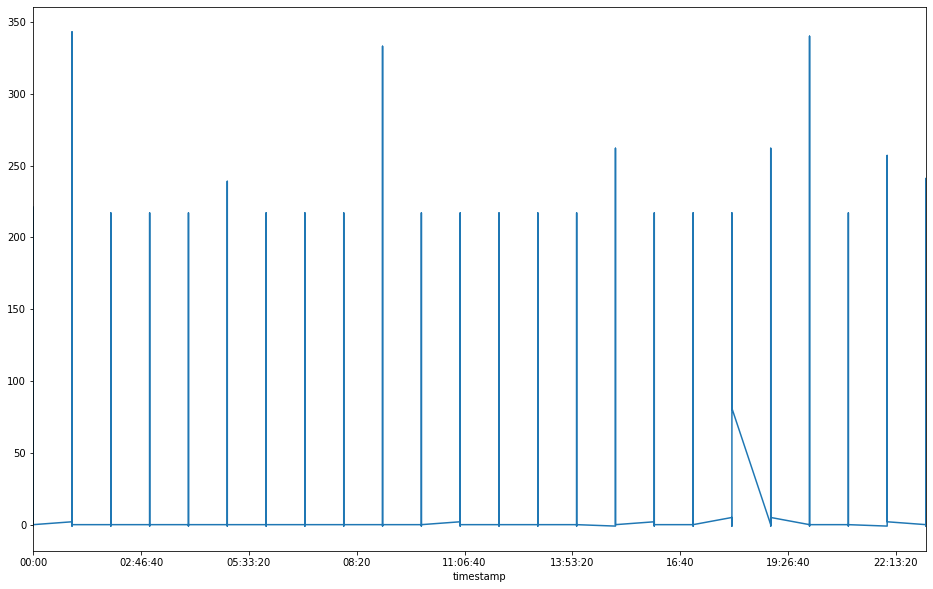

In [229]:
dfw.set_index('timestamp')['precip_depth_1_hr'].interpolate(method='linear').plot(figsize = (16,10))

# Cloud Coverage

In [230]:
dfw.cloud_coverage.value_counts()

0.0    33871
2.0    13585
4.0    10241
8.0     3531
6.0     3521
7.0     3485
1.0      713
3.0      608
5.0      526
9.0      519
Name: cloud_coverage, dtype: int64

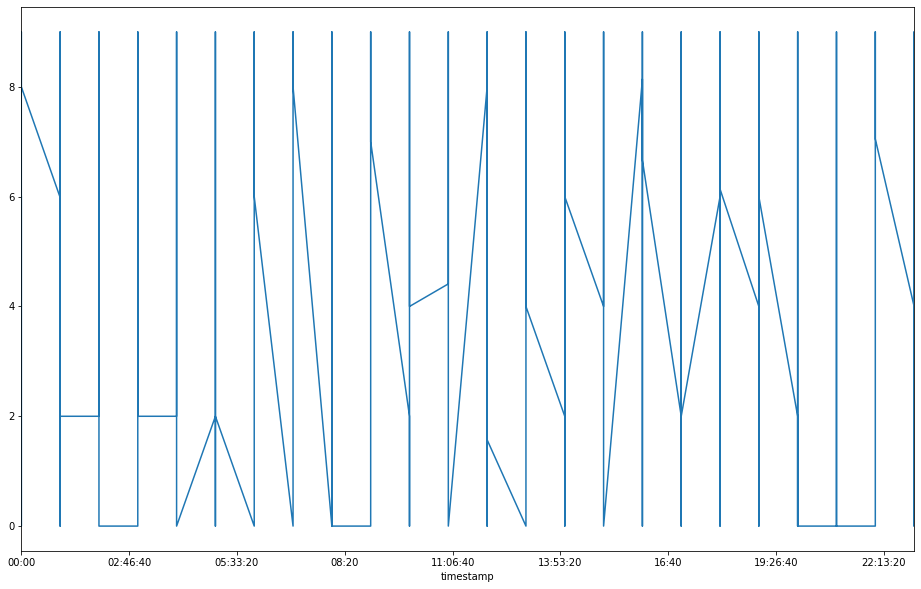

In [231]:
dfw.set_index('timestamp')['cloud_coverage'].interpolate(method='linear').plot(figsize = (16,10))

In [232]:
dfw['cloud_coverage'] = dfw['cloud_coverage'].fillna(method = 'ffill')

In [233]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        139773 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     139773 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
wind_speed            139469 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


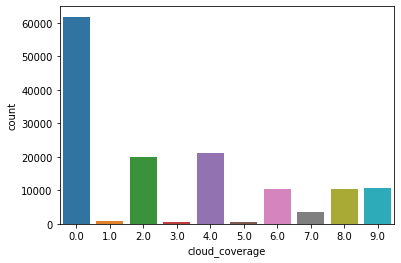

In [234]:
sns.countplot(dfw.cloud_coverage)

# All the missing values

In [235]:
dfw.fillna(method='ffill', inplace=True)

In [236]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139773 non-null float64
cloud_coverage        139773 non-null float64
dew_temperature       139773 non-null float64
precip_depth_1_hr     139773 non-null float64
sea_level_pressure    139773 non-null float64
wind_direction        139773 non-null float64
wind_speed            139773 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


# Joining all three tables

In [237]:
dfencodew = pd.merge(dfencode,dfw,on='site_id')

In [238]:
dtrain = train.join(dfencodew, on='building_id',lsuffix='_left', rsuffix='_right')

In [239]:
dtrain.head()

,building_id_left,meter,timestamp_left,site_id,building_id_right,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,...,primary_Utility,primary_Warehouse/storage,timestamp_right,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0,0,7432,2008.0,1,0,0,...,0,0,00:00:00,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
1,1,0,2016-01-01,0,0,7432,2008.0,1,0,0,...,0,0,01:00:00,24.4,6.0,21.1,-1.0,1020.2,70.0,1.5
2,2,0,2016-01-01,0,0,7432,2008.0,1,0,0,...,0,0,02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,3,0,2016-01-01,0,0,7432,2008.0,1,0,0,...,0,0,03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,4,0,2016-01-01,0,0,7432,2008.0,1,0,0,...,0,0,04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [240]:
dtrain.drop('timestamp_left', axis=1, inplace=True)

In [241]:
dtrain.columns

Index(['building_id_left', 'meter', 'site_id', 'building_id_right',
       'square_feet', 'year_built', 'primary_Education',
       'primary_Entertainment/public assembly',
       'primary_Food sales and service', 'primary_Healthcare',
       'primary_Lodging/residential', 'primary_Manufacturing/industrial',
       'primary_Office', 'primary_Other', 'primary_Parking',
       'primary_Public services', 'primary_Religious worship',
       'primary_Retail', 'primary_Services', 'primary_Technology/science',
       'primary_Utility', 'primary_Warehouse/storage', 'timestamp_right',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [242]:
dtrain.columns = ['building_id_left', 'meter', 'site_id', 'building_id_right',
       'square_feet', 'year_built', 'primary_Education',
       'primary_Entertainment/public assembly',
       'primary_Food sales and service', 'primary_Healthcare',
       'primary_Lodging/residential', 'primary_Manufacturing/industrial',
       'primary_Office', 'primary_Other', 'primary_Parking',
       'primary_Public services', 'primary_Religious worship',
       'primary_Retail', 'primary_Services', 'primary_Technology/science',
       'primary_Utility', 'primary_Warehouse/storage', 'timestamp',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed']

In [243]:
dtrain.head()

,building_id_left,meter,site_id,building_id_right,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,...,primary_Utility,primary_Warehouse/storage,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,0,7432,2008.0,1,0,0,0,...,0,0,00:00:00,25.0,6.0,20.0,-1.0,1019.7,0.0,0.0
1,1,0,0,0,7432,2008.0,1,0,0,0,...,0,0,01:00:00,24.4,6.0,21.1,-1.0,1020.2,70.0,1.5
2,2,0,0,0,7432,2008.0,1,0,0,0,...,0,0,02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,3,0,0,0,7432,2008.0,1,0,0,0,...,0,0,03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,4,0,0,0,7432,2008.0,1,0,0,0,...,0,0,04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [244]:
dtrain.tail()

,building_id_left,meter,site_id,building_id_right,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,...,primary_Utility,primary_Warehouse/storage,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216095,1444,0,0,0,7432,2008.0,1,0,0,0,...,0,0,04:00:00,16.7,0.0,12.2,0.0,1021.9,0.0,0.0
20216096,1445,0,0,0,7432,2008.0,1,0,0,0,...,0,0,05:00:00,15.0,0.0,11.7,0.0,1021.6,0.0,0.0
20216097,1446,0,0,0,7432,2008.0,1,0,0,0,...,0,0,06:00:00,13.9,2.0,12.2,0.0,1021.1,0.0,0.0
20216098,1447,0,0,0,7432,2008.0,1,0,0,0,...,0,0,07:00:00,15.0,2.0,12.2,0.0,1021.0,0.0,0.0
20216099,1448,0,0,0,7432,2008.0,1,0,0,0,...,0,0,08:00:00,14.4,2.0,12.2,0.0,1020.4,360.0,2.1


In [245]:
dtrain.shape

(20216100, 30)

In [246]:
target.shape

(20216100,)

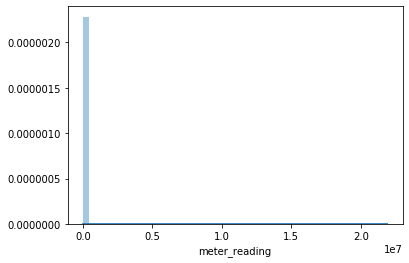

In [247]:
sns.distplot(target)

In [248]:
logtarget = np.log1p(target)

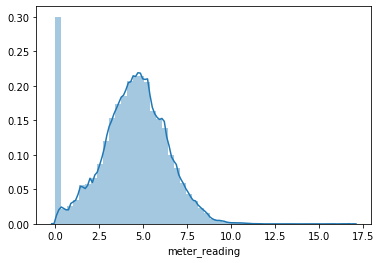

In [249]:
sns.distplot(logtarget)

In [250]:
dtrain.drop('timestamp', axis=1, inplace=True)

In [251]:
dtrain.drop('building_id_left', axis=1, inplace=True)
dtrain.drop('building_id_right', axis=1, inplace=True)

# In Vain

In [163]:
def reduced(x):
    for i in x.columns:
        if x[i].dtypes == 'float64':
            x[i].astype('float16')
    return x

In [164]:
dtrainr = reduced(dtrain)

In [167]:
dtrainr.dtypes

meter                                       int8
site_id                                    int64
square_feet                              float64
year_built                               float16
primary_Education                          uint8
primary_Entertainment/public assembly      uint8
primary_Food sales and service             uint8
primary_Healthcare                         uint8
primary_Lodging/residential                uint8
primary_Manufacturing/industrial           uint8
primary_Office                             uint8
primary_Other                              uint8
primary_Parking                            uint8
primary_Public services                    uint8
primary_Religious worship                  uint8
primary_Retail                             uint8
primary_Services                           uint8
primary_Technology/science                 uint8
primary_Utility                            uint8
primary_Warehouse/storage                  uint8
air_temperature     

In [168]:
dtrain.columns[1]

'site_id'

In [169]:
dtrain['square_feet'].dtype

dtype('float64')

In [213]:
dtrainr.dtypes

meter                                       int8
site_id                                    int64
square_feet                              float64
year_built                               float16
primary_Education                          uint8
primary_Entertainment/public assembly      uint8
primary_Food sales and service             uint8
primary_Healthcare                         uint8
primary_Lodging/residential                uint8
primary_Manufacturing/industrial           uint8
primary_Office                             uint8
primary_Other                              uint8
primary_Parking                            uint8
primary_Public services                    uint8
primary_Religious worship                  uint8
primary_Retail                             uint8
primary_Services                           uint8
primary_Technology/science                 uint8
primary_Utility                            uint8
primary_Warehouse/storage                  uint8
air_temperature     

In [158]:
dtrain.describe()

,meter,site_id,square_feet,year_built,primary_Education,primary_Entertainment/public assembly,primary_Food sales and service,primary_Healthcare,primary_Lodging/residential,primary_Manufacturing/industrial,...,primary_Technology/science,primary_Utility,primary_Warehouse/storage,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,2.021610e+07,20216100.0,2.021610e+07,20216100.0,20216100.0,20216100.0,20216100.0,20216100.0,20216100.0,20216100.0,...,20216100.0,20216100.0,20216100.0,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07,2.021610e+07
mean,6.624412e-01,0.0,-7.644652e-01,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.565776e+01,4.362659e+00,9.206373e+00,1.005844e+00,1.018884e+03,1.939307e+02,3.831037e+00
std,9.309921e-01,0.0,2.157180e-10,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.366747e+00,2.852192e+00,6.708651e+00,6.967438e+00,5.094109e+00,1.220174e+02,2.286805e+00
min,0.000000e+00,0.0,-7.644652e-01,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.700000e+00,0.000000e+00,-9.400000e+00,-1.000000e+00,9.990000e+02,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.0,-7.644652e-01,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.170000e+01,2.000000e+00,3.900000e+00,0.000000e+00,1.015000e+03,9.000000e+01,2.600000e+00
50%,0.000000e+00,0.0,-7.644652e-01,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.560000e+01,4.000000e+00,1.000000e+01,0.000000e+00,1.019100e+03,2.100000e+02,3.600000e+00
75%,1.000000e+00,0.0,-7.644652e-01,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.940000e+01,6.000000e+00,1.500000e+01,0.000000e+00,1.022900e+03,3.000000e+02,5.100000e+00
max,3.000000e+00,0.0,-7.644652e-01,2008.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.830000e+01,9.000000e+00,2.170000e+01,1.650000e+02,1.030200e+03,3.600000e+02,1.290000e+01


# Modeling

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error as mse

In [89]:
xtrain,xtest,ytrain,ytest = train_test_split(dtrain,logtarget, test_size=0.3, random_state=123)

In [92]:
xtrain.isnull().sum()

meter                                    0
site_id                                  0
square_feet                              0
year_built                               0
primary_Education                        0
primary_Entertainment/public assembly    0
primary_Food sales and service           0
primary_Healthcare                       0
primary_Lodging/residential              0
primary_Manufacturing/industrial         0
primary_Office                           0
primary_Other                            0
primary_Parking                          0
primary_Public services                  0
primary_Religious worship                0
primary_Retail                           0
primary_Services                         0
primary_Technology/science               0
primary_Utility                          0
primary_Warehouse/storage                0
air_temperature                          0
cloud_coverage                           0
dew_temperature                          0
precip_dept

In [93]:
xtrain.dtypes

meter                                       int8
site_id                                    int64
square_feet                              float64
year_built                               float16
primary_Education                          uint8
primary_Entertainment/public assembly      uint8
primary_Food sales and service             uint8
primary_Healthcare                         uint8
primary_Lodging/residential                uint8
primary_Manufacturing/industrial           uint8
primary_Office                             uint8
primary_Other                              uint8
primary_Parking                            uint8
primary_Public services                    uint8
primary_Religious worship                  uint8
primary_Retail                             uint8
primary_Services                           uint8
primary_Technology/science                 uint8
primary_Utility                            uint8
primary_Warehouse/storage                  uint8
air_temperature     

# Deep Learning

In [252]:
from sklearn.preprocessing import RobustScaler

In [90]:
from keras.models import Sequential
from keras.layers import Input, Dense, LSTM
from keras import metrics

Using TensorFlow backend.


In [106]:
from sklearn import preprocessing
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping

In [257]:
dtrain_processed = preprocessing.scale(dtrain)

In [258]:
dtrain_processed[5]

array([-0.71154331,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.69730161, -0.82836596,  1.5194749 , -0.14436349,  0.21899802,
       -1.58936922, -1.67527929])

In [259]:
dtrain_reduced =  preprocessing.scale(dtrain[:200000])

In [260]:
dtrain_reduced

array([[-0.7030845 ,  0.        ,  0.        , ...,  0.14899965,
        -1.60954385, -1.68151656],
       [-0.7030845 ,  0.        ,  0.        , ...,  0.24694255,
        -1.03342284, -1.02542405],
       [-0.7030845 ,  0.        ,  0.        , ...,  0.24694255,
        -1.60954385, -1.68151656],
       ...,
       [-0.7030845 ,  0.        ,  0.        , ...,  0.40365119,
         1.35336424,  0.11180298],
       [-0.7030845 ,  0.        ,  0.        , ...,  0.44282835,
         1.35336424,  0.81163499],
       [-0.7030845 ,  0.        ,  0.        , ...,  0.46241693,
         1.27106123,  0.11180298]])

In [262]:
target_reduced = logtarget[:200000]

In [263]:
target_reduced.value_counts()

0.000000    25783
3.258097      405
3.044522      345
3.218876      294
3.433987      255
2.750701      245
2.944439      243
3.091042      239
1.609438      239
2.397895      236
3.931826      236
2.922317      235
3.465736      204
3.496508      204
0.788457      203
2.772589      200
1.098612      186
2.281576      186
1.945910      184
3.068750      179
4.023564      175
1.791759      175
0.980842      171
2.079442      170
3.401197      164
2.833213      162
3.295837      162
4.615121      161
3.526361      160
1.466329      159
            ...  
2.902278        1
7.197316        1
5.769445        1
5.648622        1
4.306714        1
1.171770        1
4.245849        1
4.949759        1
4.846091        1
7.655140        1
7.121898        1
1.299674        1
5.359290        1
6.928264        1
7.080060        1
6.838885        1
4.810394        1
4.655302        1
9.436057        1
5.536014        1
3.213823        1
2.655142        1
3.429104        1
6.097018        1
6.539566  

In [264]:
xtrain,xtest,ytrain,ytest = train_test_split(dtrain_reduced,target_reduced, test_size=0.3, random_state=123)

In [162]:
x_train = np.array(xtrain)
y = np.array(ytrain)

In [163]:
x_test = np.array(xtest)
y_test = np.array(ytest)

In [164]:
x_train.shape

(140000, 27)

In [165]:
y.shape

(140000,)

In [265]:
n_cols=xtrain.shape[1]
n_cols

27

In [323]:
model = Sequential()

In [324]:
model.add(Dense(28, input_shape=(n_cols,)))
model.add(Dense(10))
model.add(Dense(1))

In [325]:
model.compile(loss='mean_squared_error', optimizer='adam',metrics = [metrics.mae])

In [326]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 28)                784       
_________________________________________________________________
dense_55 (Dense)             (None, 10)                290       
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 11        
Total params: 1,085
Trainable params: 1,085
Non-trainable params: 0
_________________________________________________________________


In [327]:
early_stop = EarlyStopping(patience=5)

In [335]:
history = model.fit(x_train,y, epochs=38, validation_split=0.2)

Train on 112000 samples, validate on 28000 samples
Epoch 1/38
112000/112000 [==============================] - 4s 34us/step - loss: 4.8253 - mean_absolute_error: 1.7627 - val_loss: 4.7843 - val_mean_absolute_error: 1.7285
Epoch 2/38
112000/112000 [==============================] - 4s 33us/step - loss: 4.8277 - mean_absolute_error: 1.7632 - val_loss: 4.7513 - val_mean_absolute_error: 1.7362
Epoch 3/38
112000/112000 [==============================] - 4s 33us/step - loss: 4.8267 - mean_absolute_error: 1.7630 - val_loss: 4.7867 - val_mean_absolute_error: 1.7770
Epoch 4/38
112000/112000 [==============================] - 4s 33us/step - loss: 4.8274 - mean_absolute_error: 1.7631 - val_loss: 4.7628 - val_mean_absolute_error: 1.7317
Epoch 5/38
112000/112000 [==============================] - 4s 33us/step - loss: 4.8266 - mean_absolute_error: 1.7631 - val_loss: 4.7456 - val_mean_absolute_error: 1.7488
Epoch 6/38
112000/112000 [==============================] - 4s 33us/step - loss: 4.8268 - mean

In [336]:
predict = model.predict(x_test)

In [337]:
predict

array([[4.0951095],
       [5.010177 ],
       [3.5505087],
       ...,
       [4.626493 ],
       [4.08888  ],
       [3.890367 ]], dtype=float32)

In [338]:
np.exp(predict)

array([[ 60.04591 ],
       [149.93129 ],
       [ 34.83103 ],
       ...,
       [102.155174],
       [ 59.673023],
       [ 48.92884 ]], dtype=float32)

In [339]:
np.exp(y_test)

array([1.66820e+00, 1.00000e+00, 1.69640e+02, ..., 4.67642e+03,
       1.00000e+00, 1.34419e+03])

In [340]:
from sklearn.metrics import mean_squared_error as mse

In [341]:
np.sqrt(mse(y_test,predict))

2.201468085213859

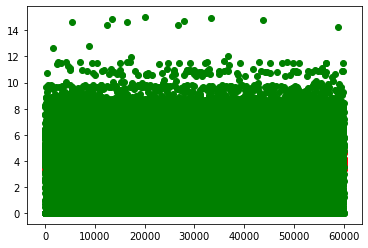

In [205]:
plt.scatter(range(predict.size),predict,c='r')
plt.scatter(range(y_test.size),y_test, c='g')
plt.show()

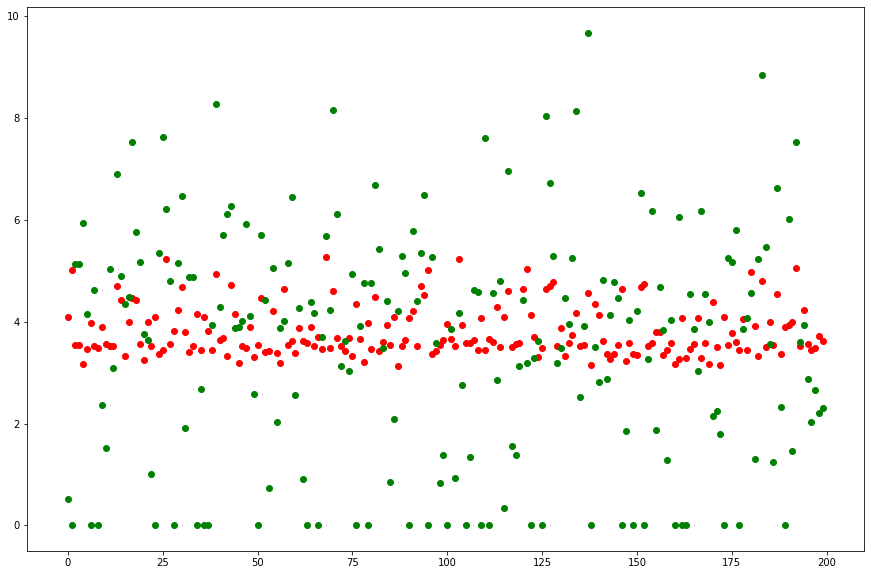

In [342]:
plt.figure(figsize=(15,10))
plt.scatter(range(200),predict[:200],c='r')
plt.scatter(range(200),y_test[:200], c='g')
plt.show()

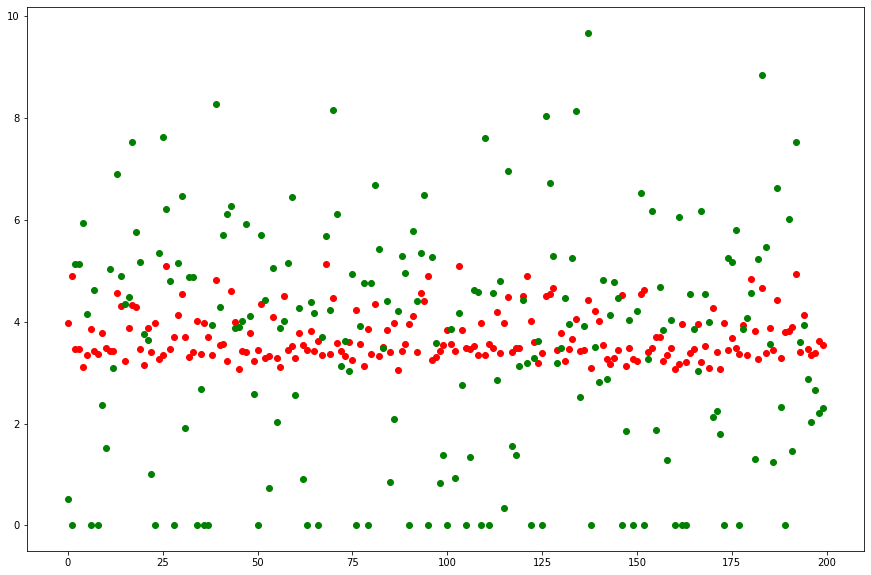

In [310]:
plt.figure(figsize=(15,10))
plt.scatter(range(200),predict[:200],c='r')
plt.scatter(range(200),y_test[:200], c='g')
plt.show()

In [142]:
history

In [145]:
predict.size

6064830

In [148]:
predict[200]

array([4.2920465], dtype=float32)

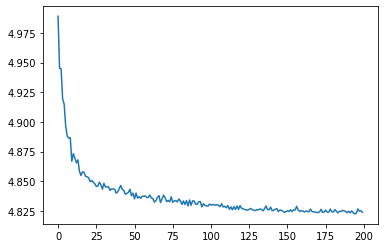

In [188]:
plt.plot(history.history['loss'])